# Modele de clusterizare
## Prima Metodă de clusterizare
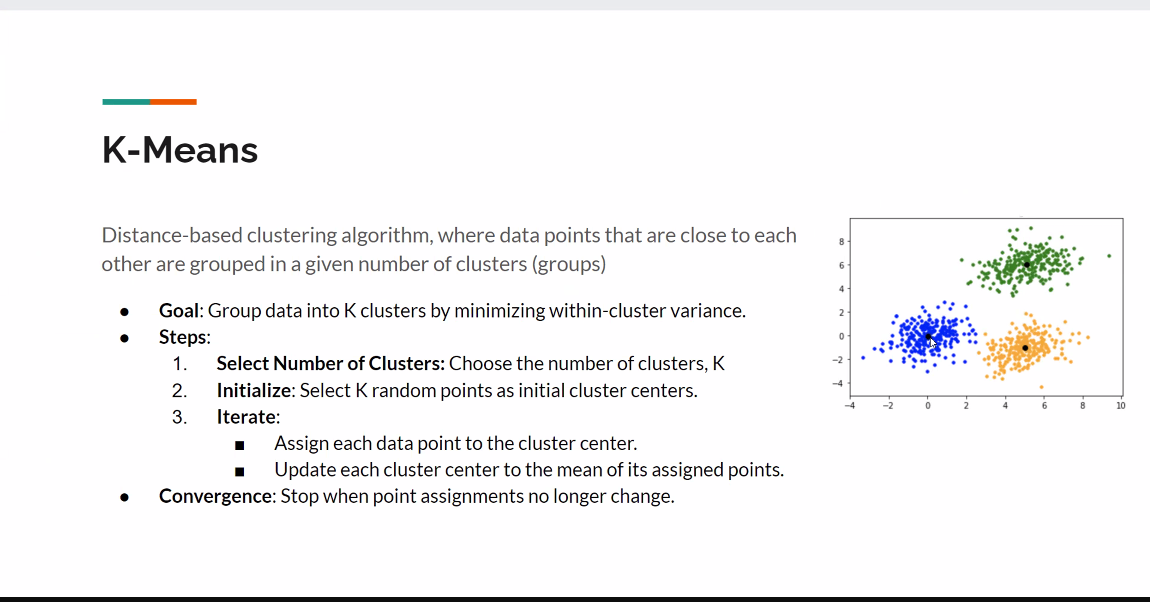
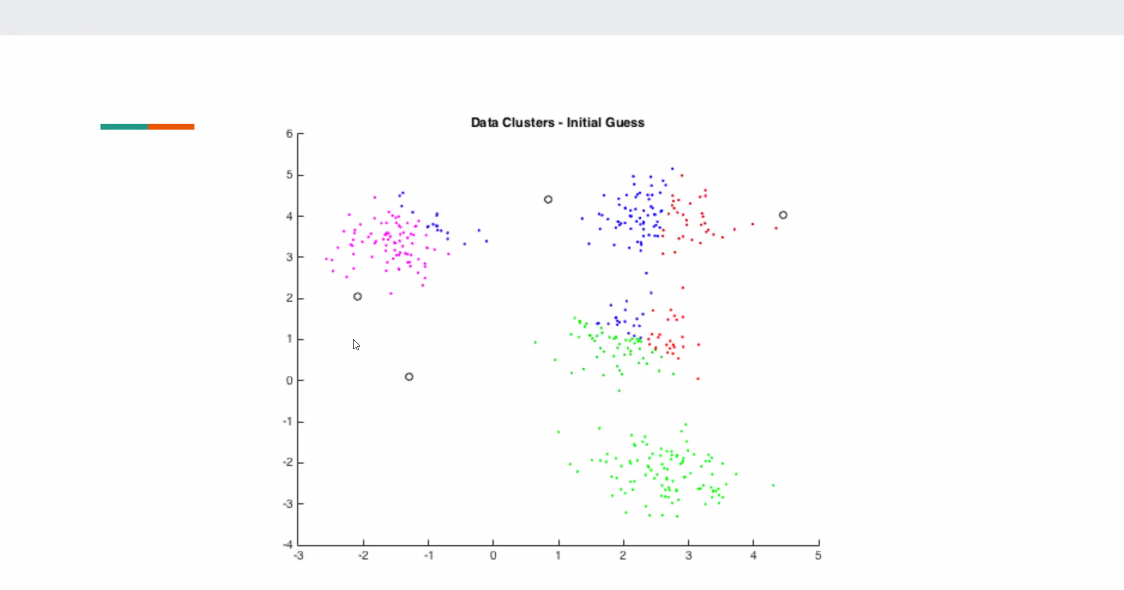


### Cum să găsești the ideal number of k - 1st Method
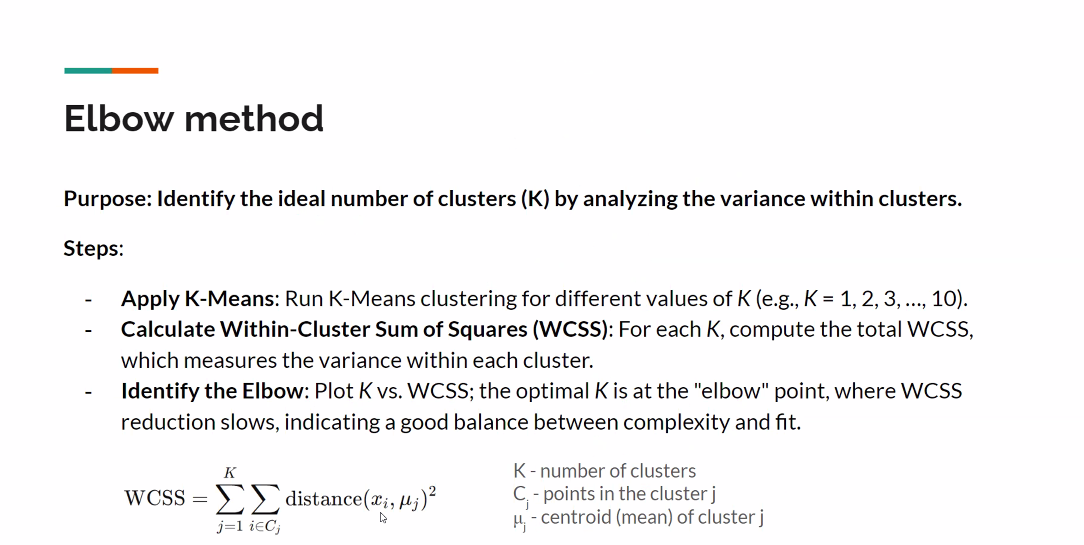
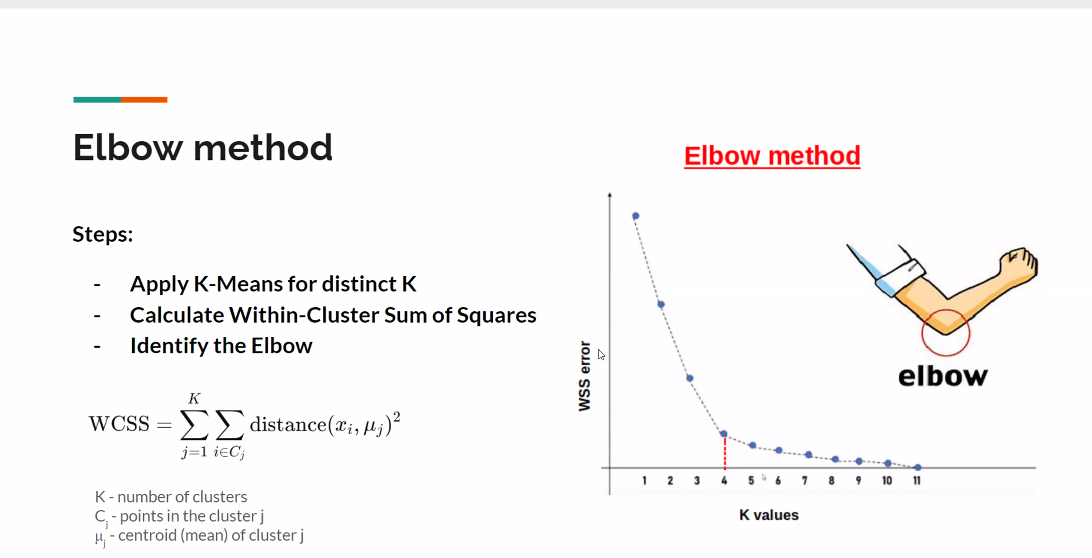


### Cum să găsești the ideal number of k - 2st Method
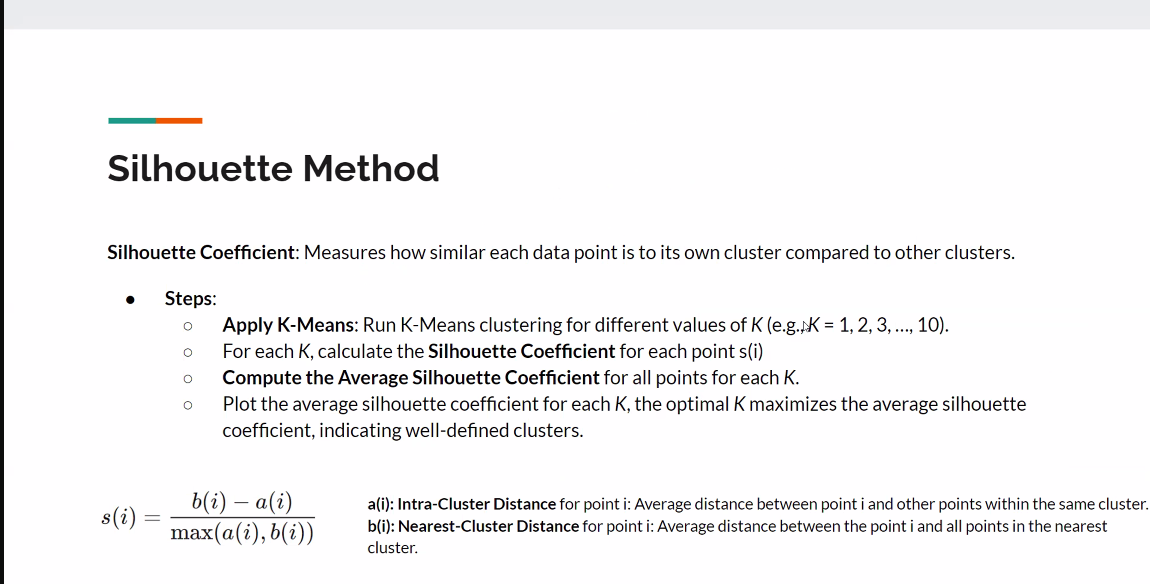Î

### Downsides of K-Means
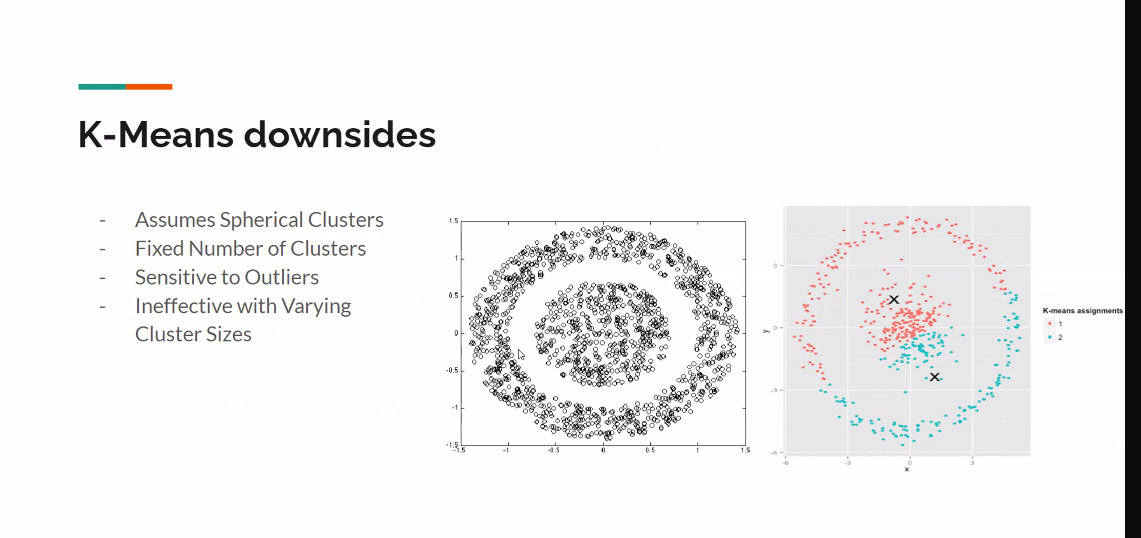

## A doua metodă de clusterizare
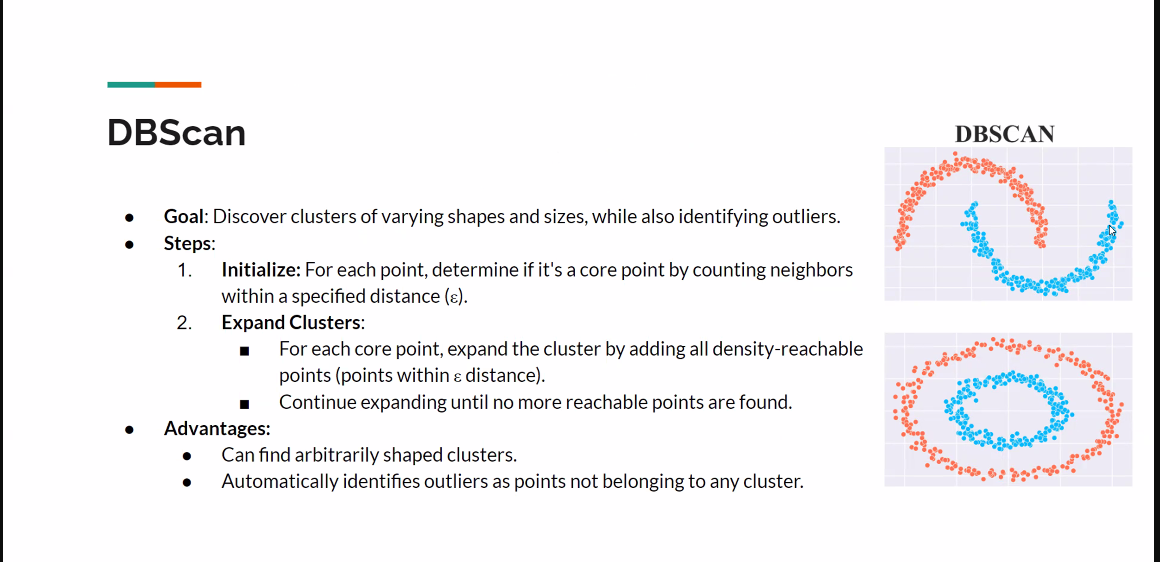
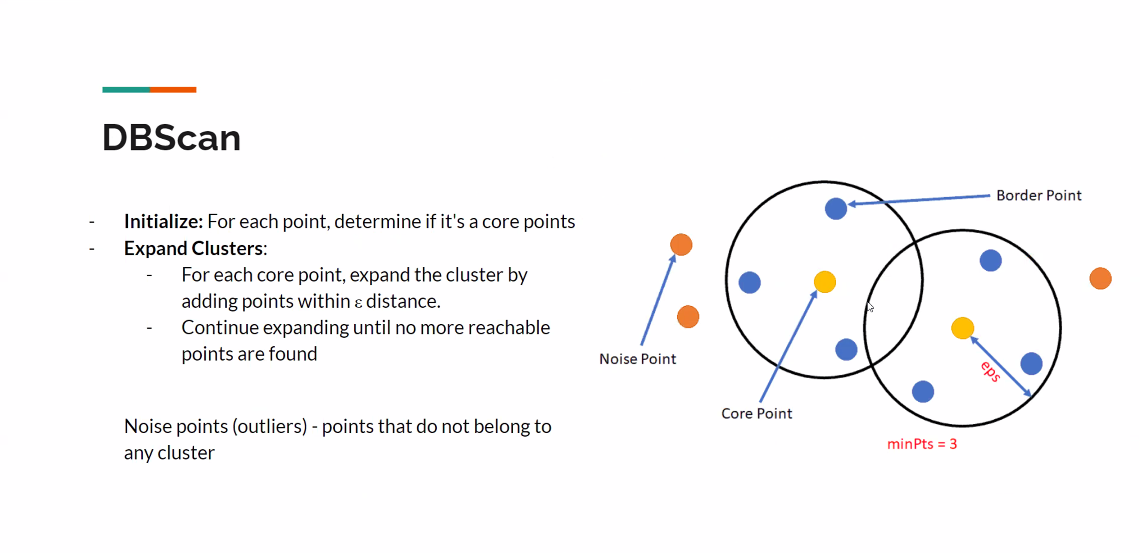
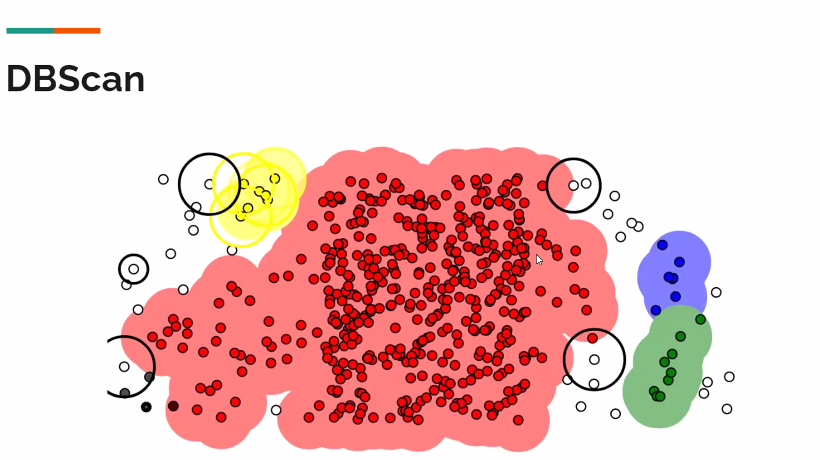

# DBScan VS K-means
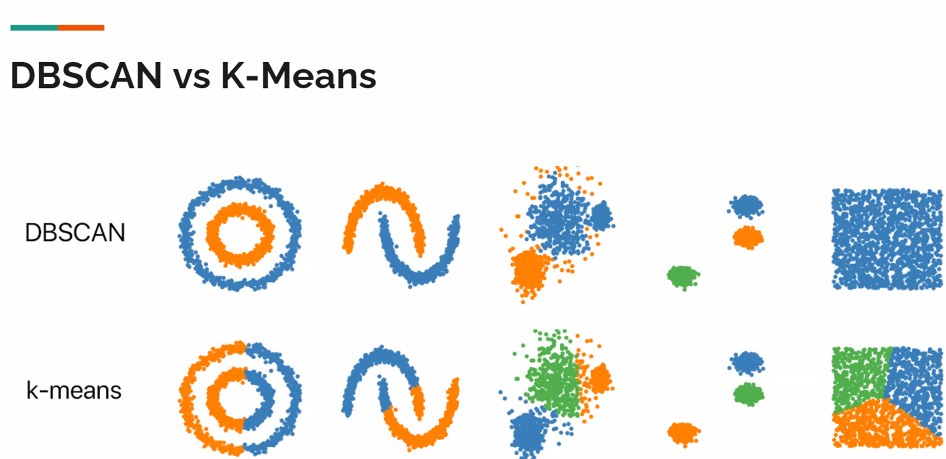

## A 3-a metodă de clusterizate
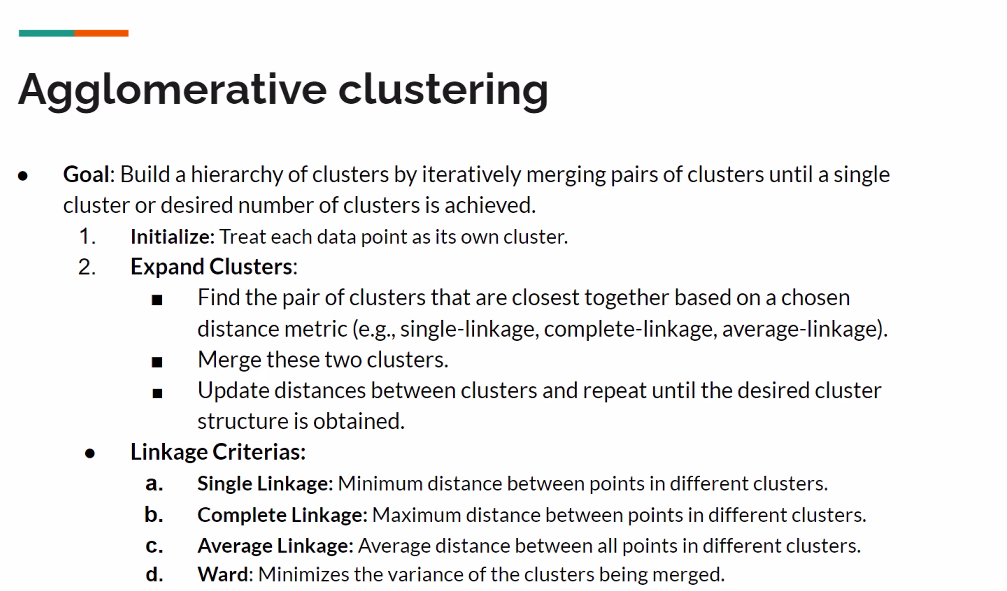
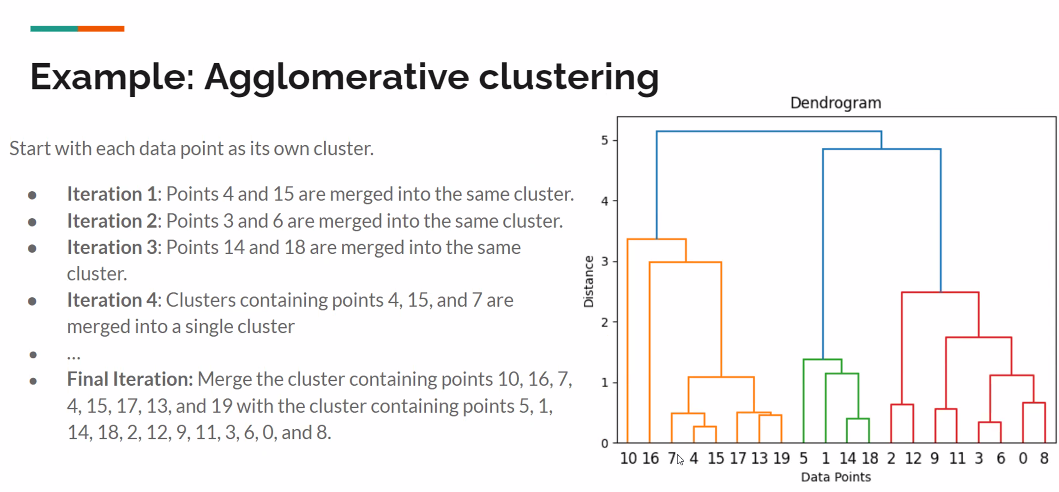

# Comparison between clustering algorithms

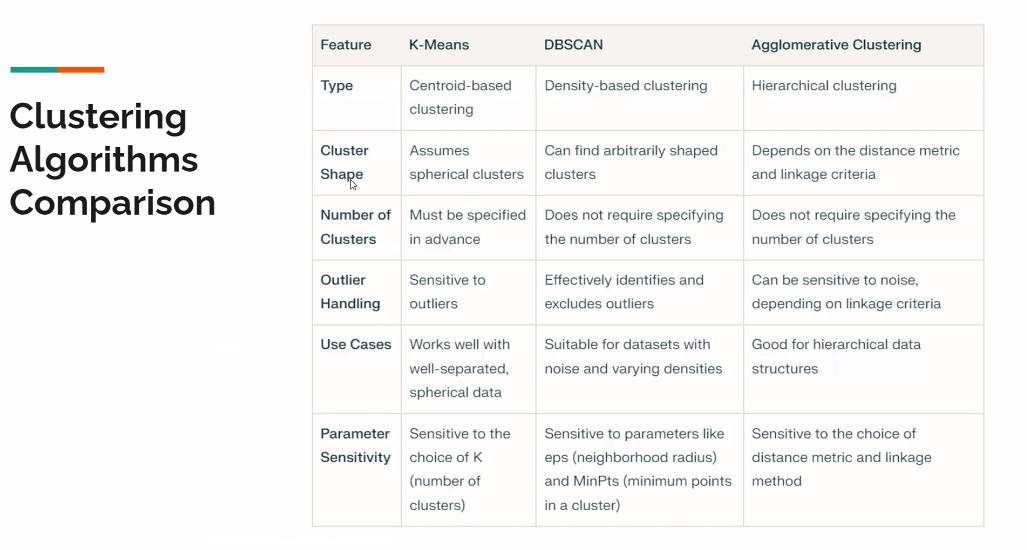

In [1]:
import pandas as pd
import seaborn as sns


In [3]:
data = pd.read_csv("D:\Programming\excalibur\data\Mall_Customers.csv")
df = pd.DataFrame(data)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\uvang\AppData\Local\Temp\ipykernel_9604\1054303112.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\Programming\excalibur\data\Mall_Customers.csv")


In [4]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [9]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

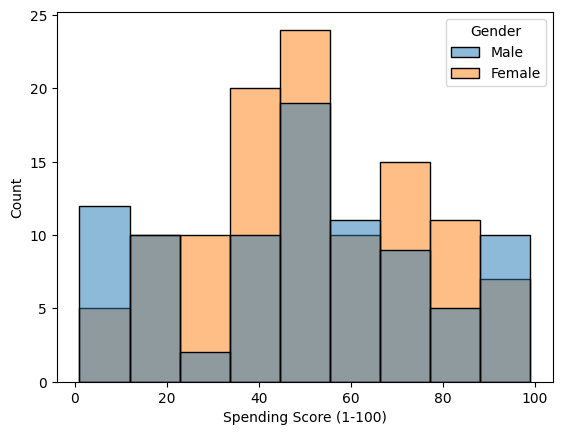

In [12]:
sns.histplot(data=df, x='Spending Score (1-100)', hue="Gender")

In [34]:
df = df.rename(columns={"Gender":"gender", "Spending Score (1-100)" : "spending_score", "CustomerID":"customerid", "Age":"age", "Annual Income (k$)": "income"})

In [29]:

sns.pairplot(df.drop(columns="customerid"))

KeyError: "['customerid'] not found in axis"

In [24]:
df.drop(columns=["customerid", "gender"], inplace=True)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [40]:
df_scaled

age  annual_income  spending_score
0   -1.424569      -1.738999       -0.434801
1   -1.281035      -1.738999        1.195704
2   -1.352802      -1.700830       -1.715913
3   -1.137502      -1.700830        1.040418
4   -0.563369      -1.662660       -0.395980
..        ...            ...             ...
195 -0.276302       2.268791        1.118061
196  0.441365       2.497807       -0.861839
197 -0.491602       2.497807        0.923953
198 -0.491602       2.917671       -1.250054
199 -0.635135       2.917671        1.273347

[200 rows x 3 columns]

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

kmeans.fit(df_scaled)


KMeans(n_clusters=3)

In [68]:
kmeans.labels_

array([5, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 2, 5, 1, 5,
       1, 5, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 4, 0, 4, 0, 4, 0,
       3, 0, 4, 0, 4, 0, 3, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [74]:
df_labeled = df.copy()
df_labeled['label'] = kmeans.labels_

df_labeled.label.value_counts()

label
1    93
2    67
0    40
Name: count, dtype: int64

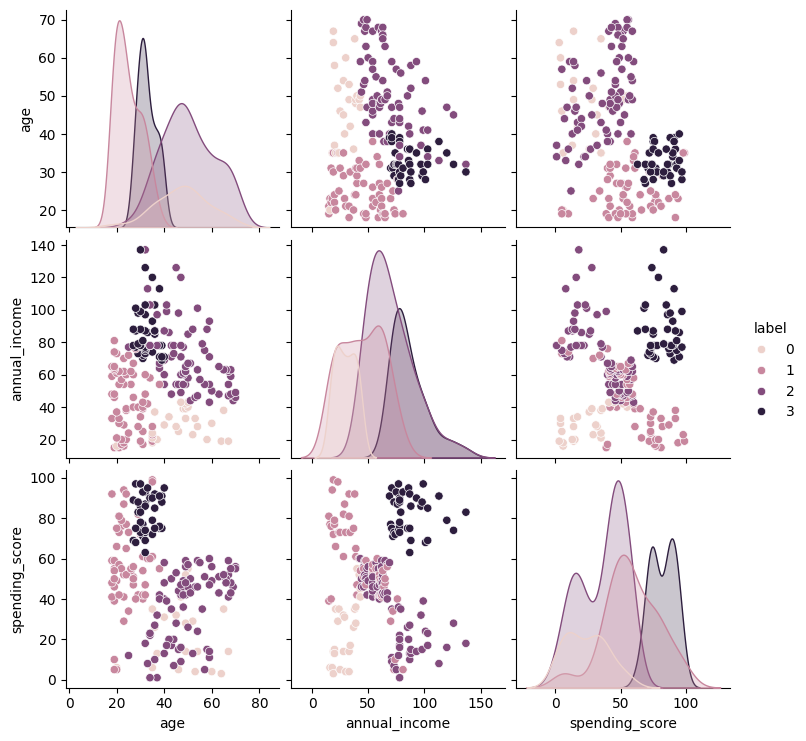

In [62]:
sns.pairplot(data=df_labeled, hue="label")

<Axes: xlabel='label', ylabel='annual_income'>

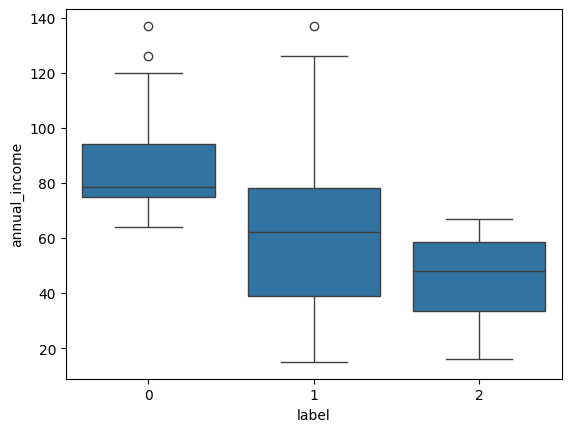

In [75]:
sns.boxplot(data=df_labeled, x='label', y="annual_income")


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[["age","annual_income", 'spending_score']])
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
pca_df['label'] = df_labeled['label']

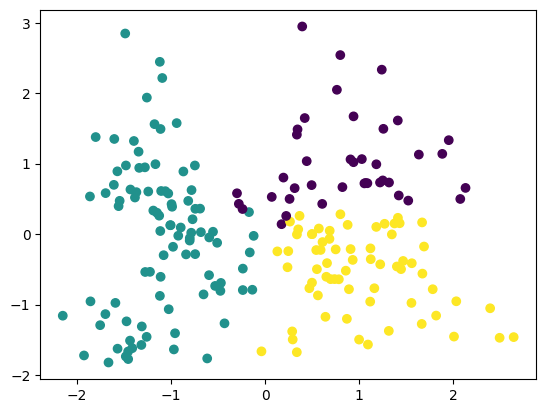

In [77]:
import matplotlib.pyplot as plt

plt.scatter(pca_df.PCA1, pca_df.PCA2, c=pca_df['label'])

In [78]:
kmeans.inertia_


297.0265446338419

In [82]:
wcss_list =[]
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)

    kmeans.fit(df_scaled)
    wcss_list.append(kmeans.inertia_)



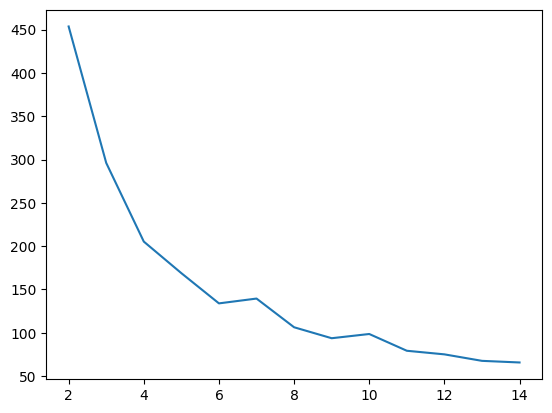

In [84]:
plt.plot(range(2,15), wcss_list)

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [89]:
df_labeled = df.copy()
df_labeled['label'] = kmeans.labels_

df_labeled.label.value_counts()

label
2    54
0    47
3    40
1    39
4    20
Name: count, dtype: int64

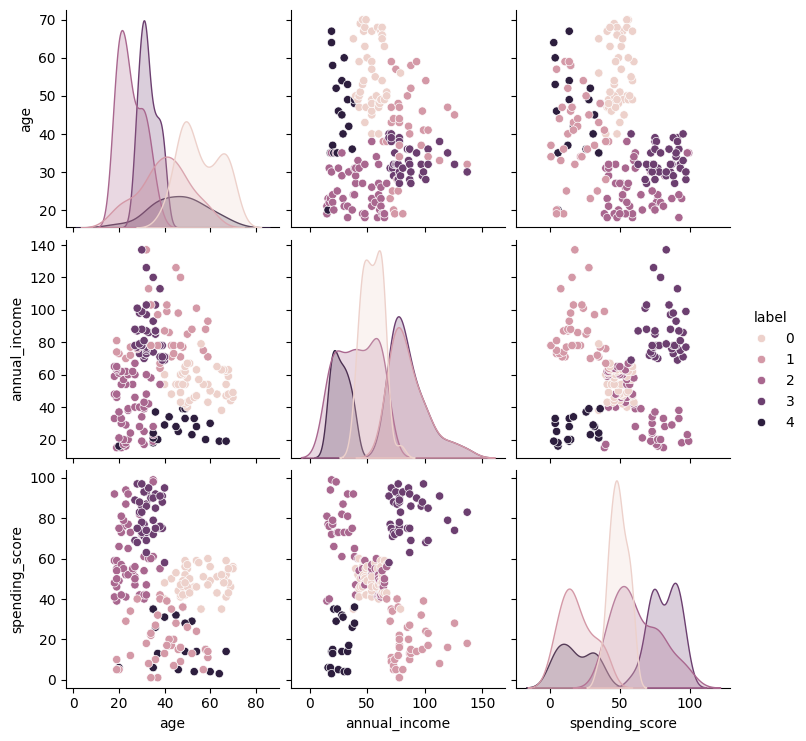

In [90]:
sns.pairplot(data=df_labeled, hue="label")

In [91]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5)

agglom.fit(df_scaled)

AgglomerativeClustering(n_clusters=5)

In [92]:
agglom.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [93]:
df_labeled = df.copy()
df_labeled['label'] = agglom.labels_

df_labeled.label.value_counts()

label
0    66
1    45
2    39
3    28
4    22
Name: count, dtype: int64

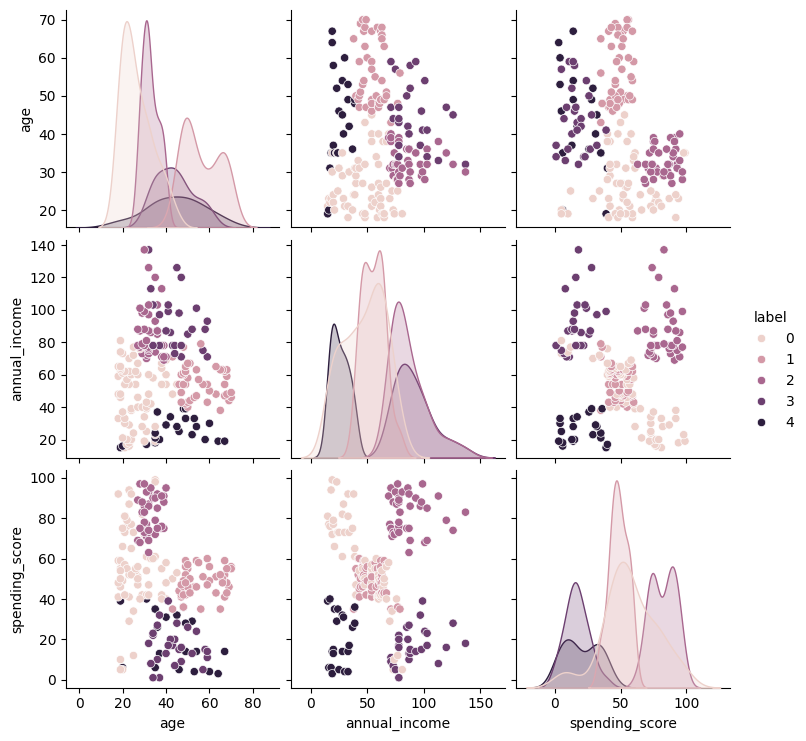

In [94]:
sns.pairplot(data=df_labeled, hue="label")

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
def plot_dendogram(model, **kwargs):
    children = model.children_

    distance = np.arange(children.shape[0])

    no_of_observations = np.arange(2, children.shape[0] + 2)

    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

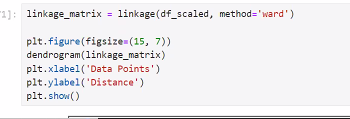

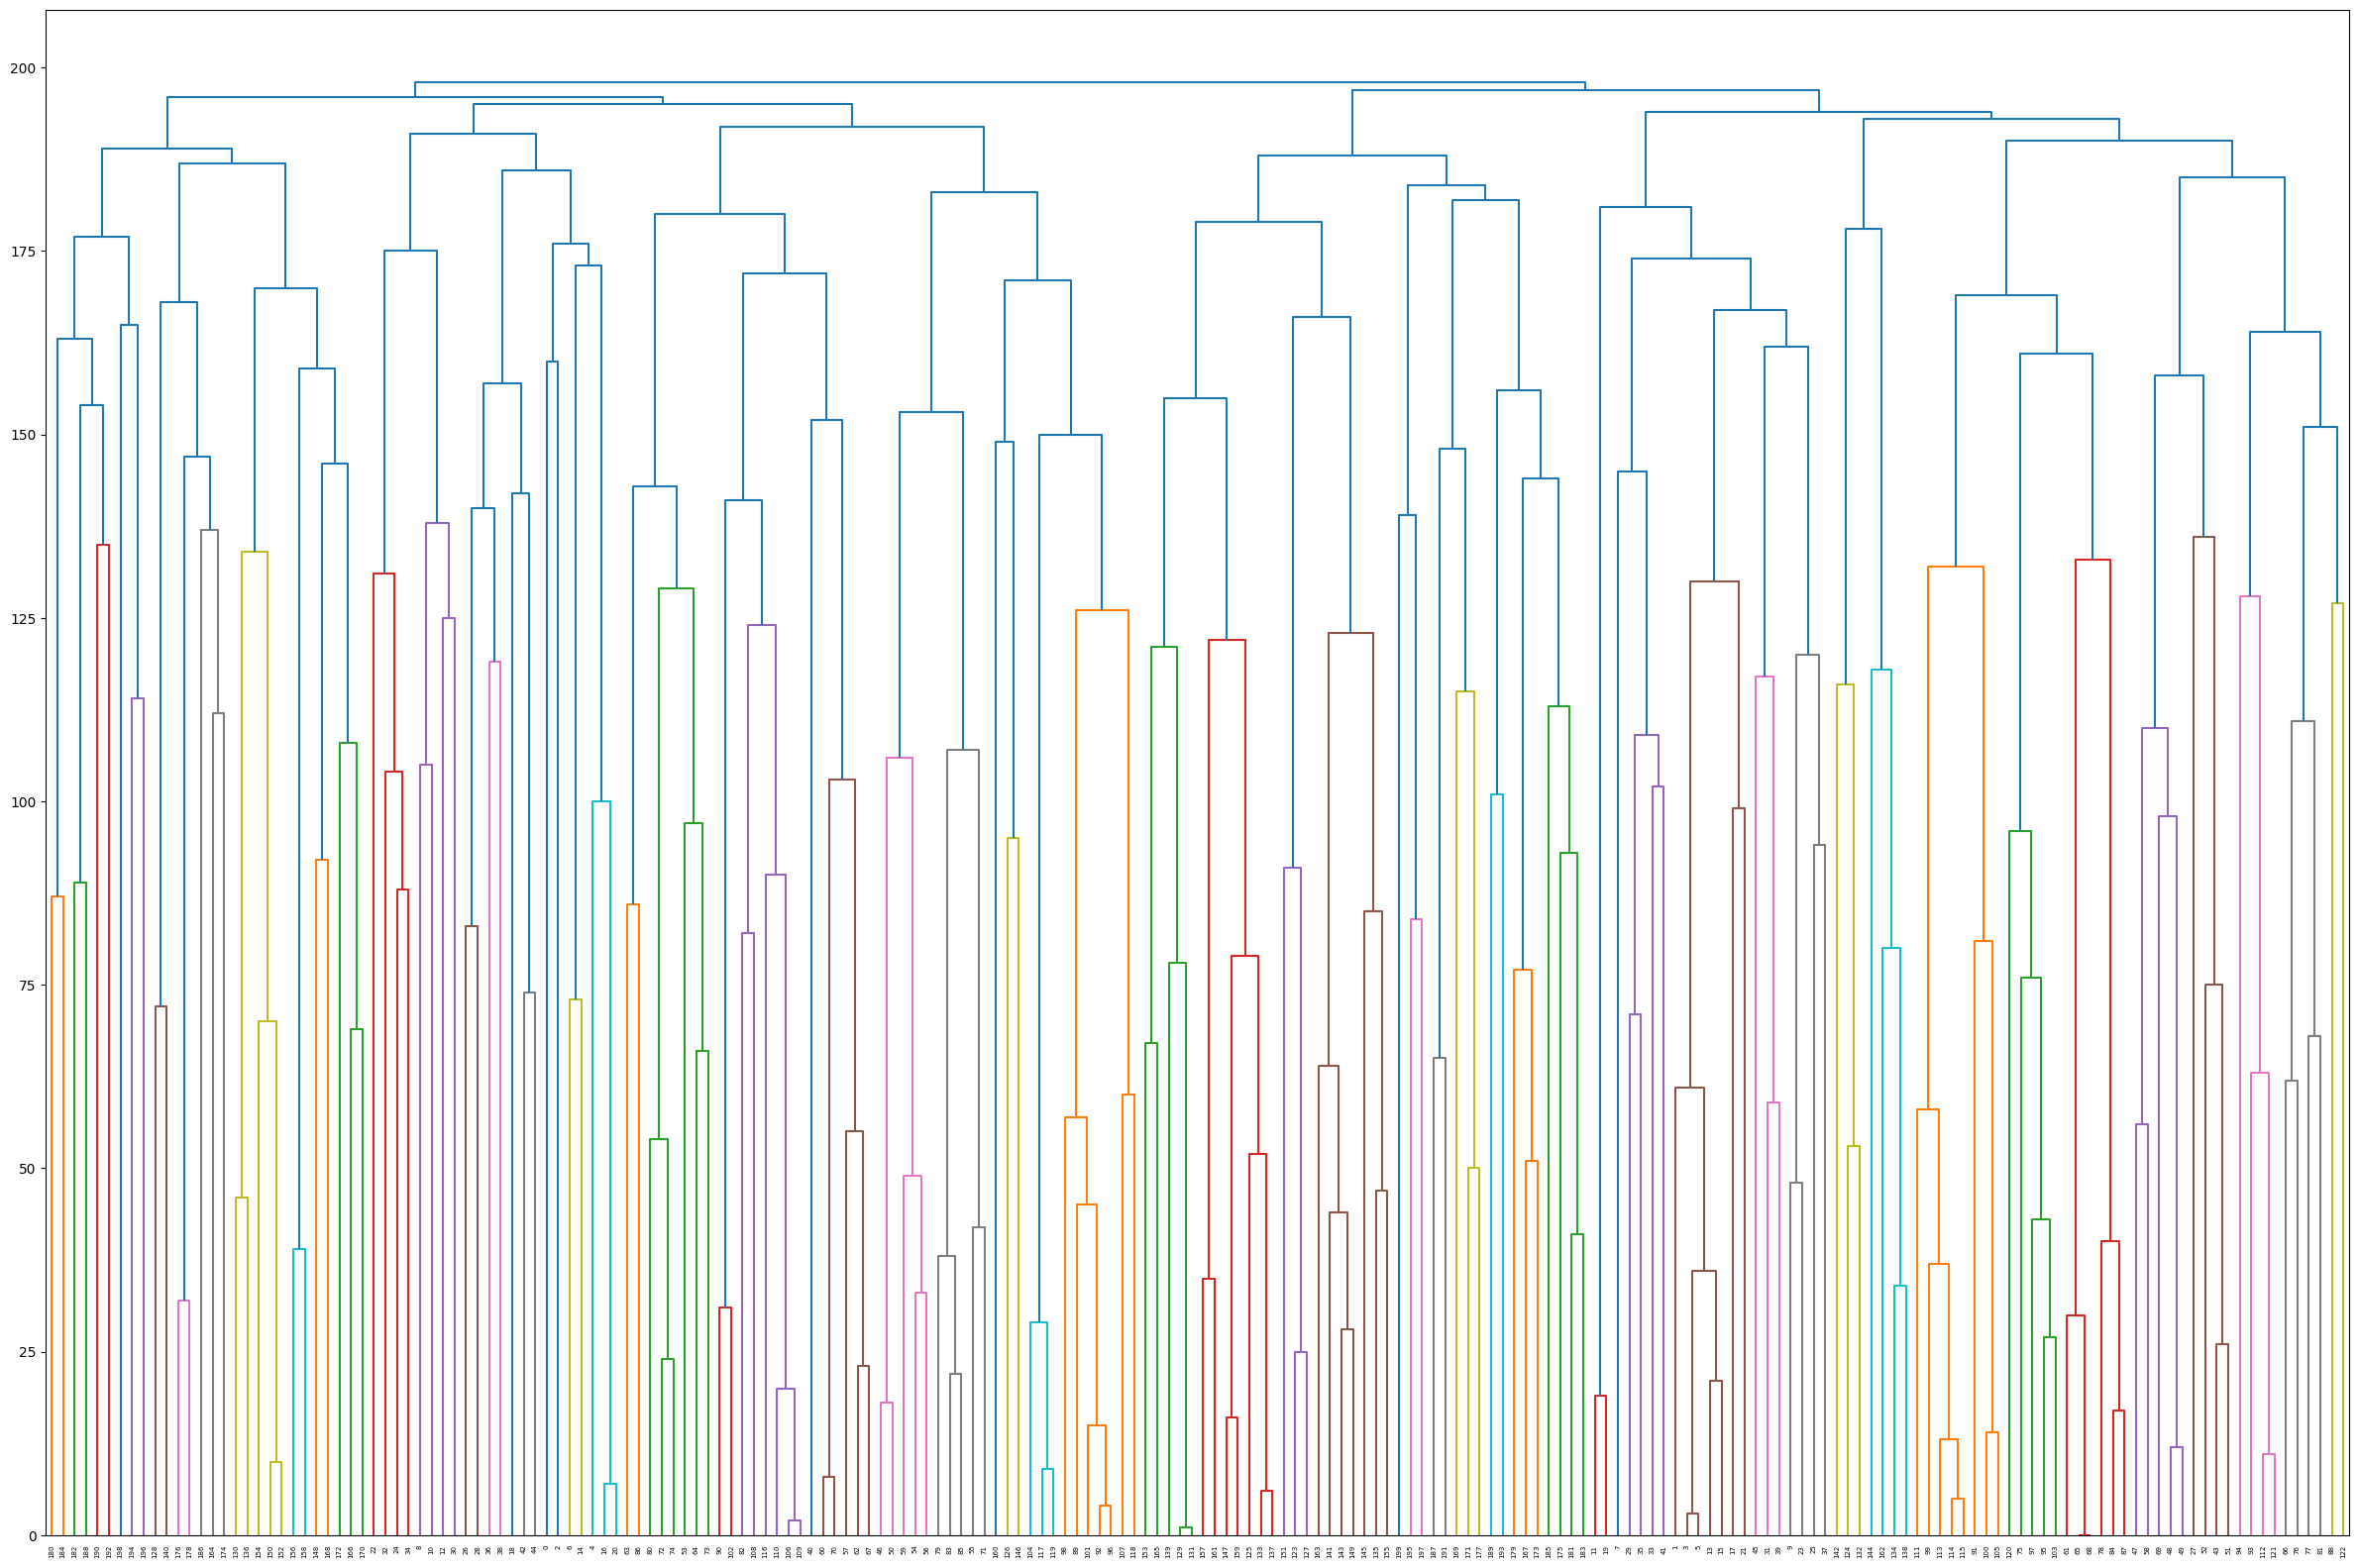

In [ ]:
linkage = linkage(df_scaled, method="ward")

plt.figure(figsize=[30, 20])
plot_dendogram(agglom)

In [102]:
df.iloc[[106, 109]]

age  annual_income  spending_score
106   66             63              50
109   66             63              48

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(df_scaled)

df_labeled = df.copy()
df_labeled['label'] = dbscan.labels_

df_labeled.label.value_counts()


label
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

In [114]:
pd.Series(dbscan.labels_).value_counts()

-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

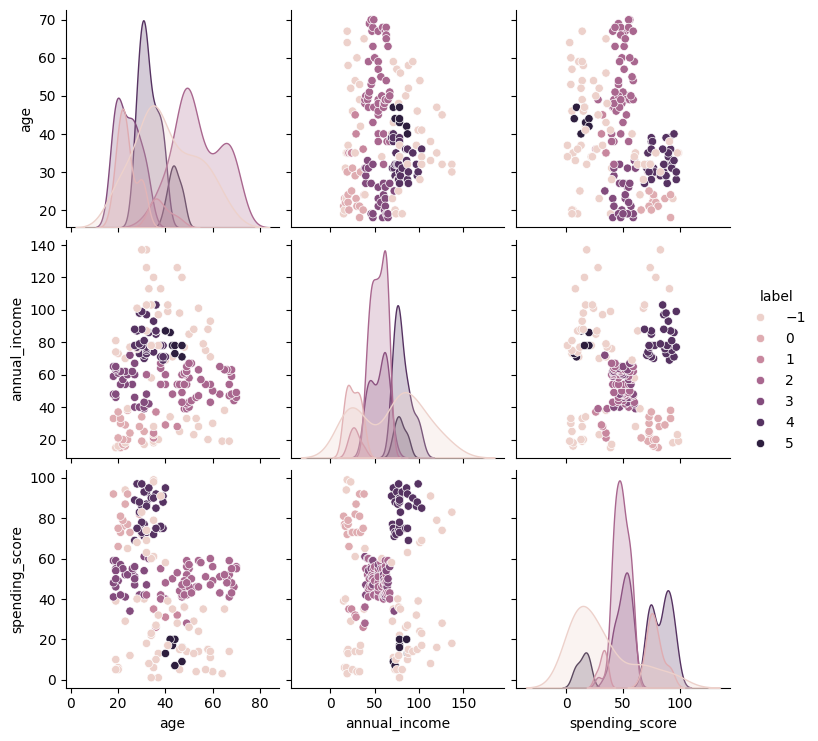

In [104]:
sns.pairplot(data=df_labeled, hue="label")

In [105]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)

neighbors.fit(df_scaled)
distances, indices = neighbors.kneighbors(df_scaled)

In [106]:
distances

array([[0.        , 0.86544824, 1.07530686, 1.15613597, 1.18113487,
        1.19965646],
       [0.        , 0.214878  , 0.21817778, 0.22058087, 0.32694123,
        0.53704392],
       [0.        , 1.07920369, 1.25922251, 1.28368768, 1.53846858,
        1.56931773],
       ...,
       [0.        , 0.36943274, 0.5647686 , 0.89909997, 0.93122999,
        1.01758095],
       [0.        , 0.99751656, 1.09426882, 1.25933597, 1.32002357,
        1.45012991],
       [0.        , 0.5647686 , 0.75757567, 1.12483867, 1.3695355 ,
        1.41427672]])

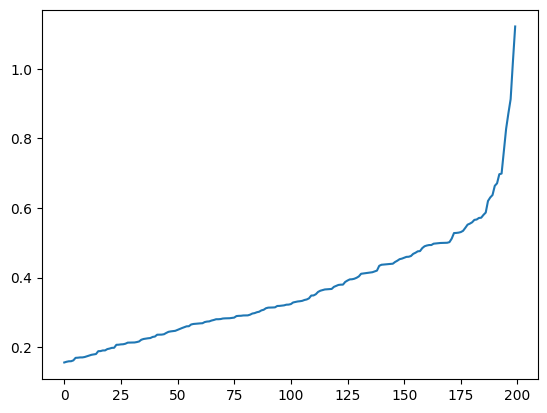

In [109]:
sorted_values = sorted(distances.mean(axis=1))
plt.plot(sorted_values)